In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [4]:
data_v1 = pd.read_csv('boligsiden_fix.csv')
data_v1.columns

Index(['Adress', 'City', 'Street name', 'Postal code', 'Latitude', 'Longitude',
       'Rooms', 'Property type', 'Energy label', 'Price', 'Province',
       'Days on Market', 'Link', 'Off. vurdering', 'Home size',
       'Monthly expense', 'Ground size', 'Transport Station Distance (km)',
       'Beach Distance (km)', 'School Distance (km)',
       'Restaurant Distance (km)', 'Hospital Distance (km)',
       'Mall Distance (km)', 'Supermarkets Distance (km)',
       'Distance to Largest City (km)', 'Municipality', 'AverageAge',
       'NumberOfChildren', 'Men', 'Women', 'AverageIncome',
       'Elementary school', 'High school education', 'Vocational Education',
       'Short Higher Education', 'Intermediate Higher Education',
       'Bachelor's programmes', 'Longer Higher Education',
       'PhD and research programs', 'Special Education expense',
       'Healthcare expense', 'Green Spaces expense', 'Infrastructure expense',
       'Social Services expense', 'Landejendom', 'Fritidsbol

# Test for missing values #

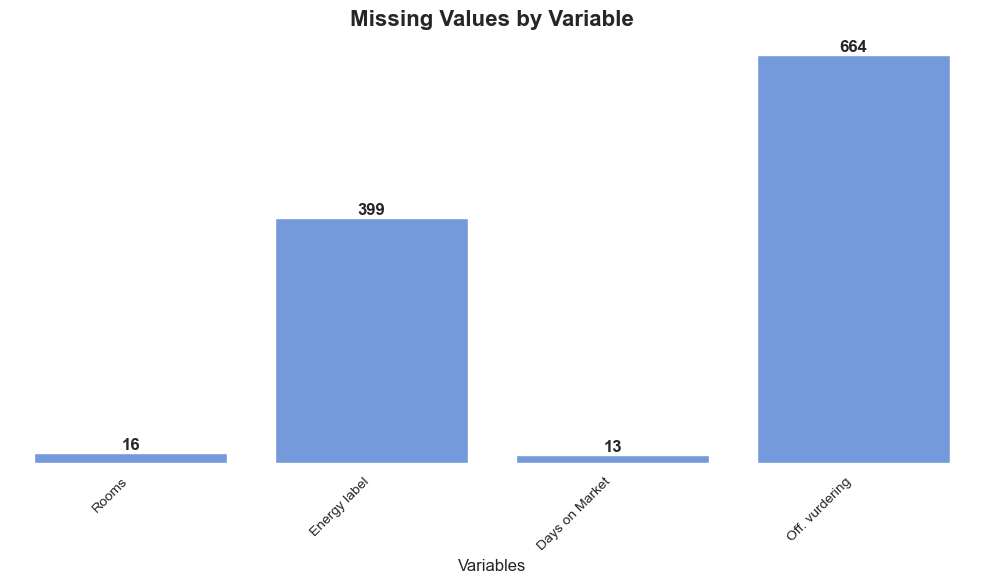

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values for each column
missing_values = data_v1.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, color='cornflowerblue')

# Remove the top and right spines (outer box)
sns.despine(left=True, bottom=True)

# Add title and remove y-axis label
plt.title('Missing Values by Variable', fontsize=16, weight='bold')
plt.ylabel('')  # Remove y-axis label
plt.xlabel('Variables', fontsize=12)

# Add the number of missing values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12, weight='bold')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remove the y-axis ticks and line
ax.yaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.savefig('missing_values_plot.png', dpi=300)
plt.show()



Original dataset length: 9915
Dataset length after dropping missing 'Off. vurdering': 9251


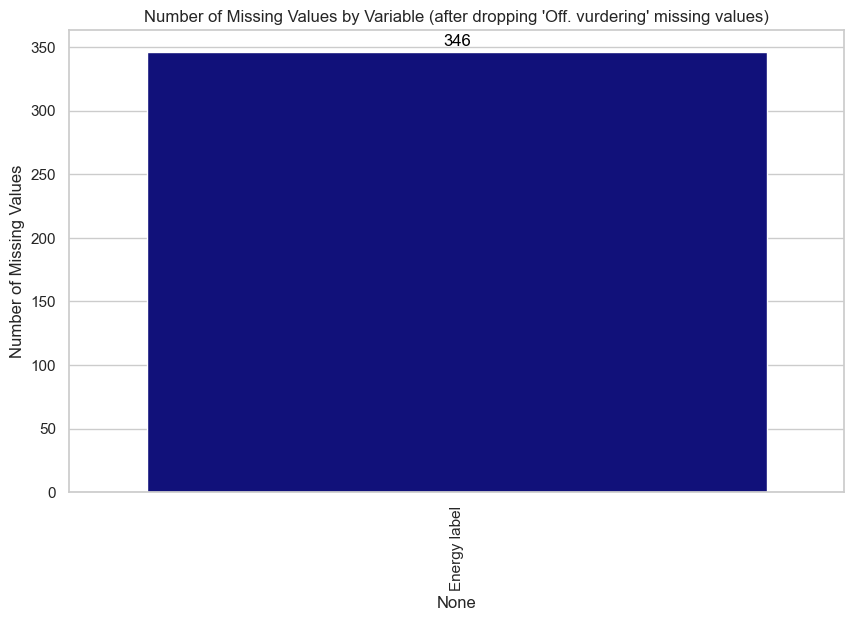

In [88]:
# Drop rows where the "Off. vurdering" column has missing values
data_v1_cleaned = data_v1.dropna(subset=['Off. vurdering'])

# Check how many rows were dropped by comparing the original and new dataset lengths
print(f"Original dataset length: {len(data_v1)}")
print(f"Dataset length after dropping missing 'Off. vurdering': {len(data_v1_cleaned)}")

# Plot the remaining missing values
missing_values = data_v1_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, color='darkblue')
for i, v in enumerate(missing_values):
    ax.text(i, v + 5, str(v), color='black', ha='center', fontsize=12)
plt.title("Number of Missing Values by Variable (after dropping 'Off. vurdering' missing values)")
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.show()


C:\Users\sd101\AppData\Local\Temp\ipykernel_10660\4258598793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1_cleaned['Energy label'] = data_v1_cleaned['Energy label'].replace(['A2020', 'A2015', 'A2'], 'A')


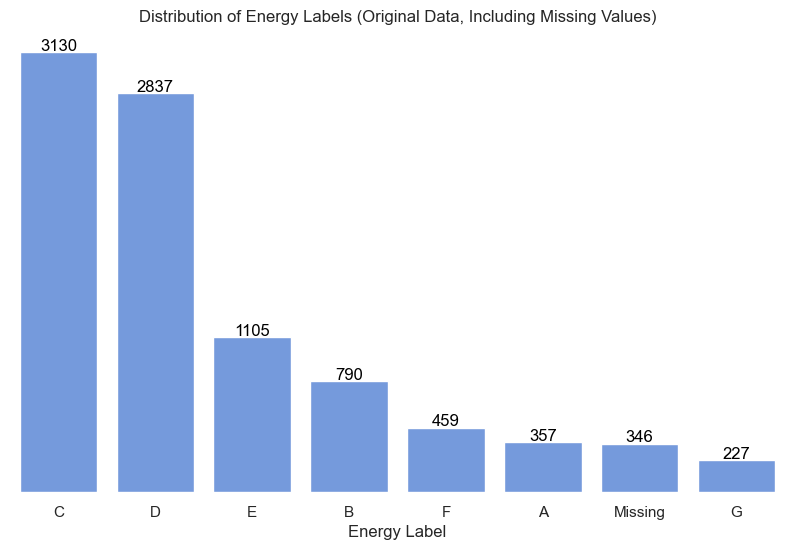

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

data_v1_cleaned['Energy label'] = data_v1_cleaned['Energy label'].replace(['A2020', 'A2015', 'A2'], 'A')
# Count the occurrences of each category in the 'Energy label' column, including missing values
energy_label_counts = data_v1_cleaned['Energy label'].fillna('Missing').value_counts()

# Plot the counts as a bar plot without y-axis, gridlines, and surrounding box
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=energy_label_counts.index, y=energy_label_counts.values, color='cornflowerblue')

# Remove the y-axis and gridlines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

# Add labels on top of each bar
for i, v in enumerate(energy_label_counts.values):
    ax.text(i, v + 10, str(v), color='black', ha='center', fontsize=12)

plt.title("Distribution of Energy Labels (Original Data, Including Missing Values)")
plt.xlabel("Energy Label")
plt.savefig('missing_values_plot_2.png', dpi=300)
plt.show()




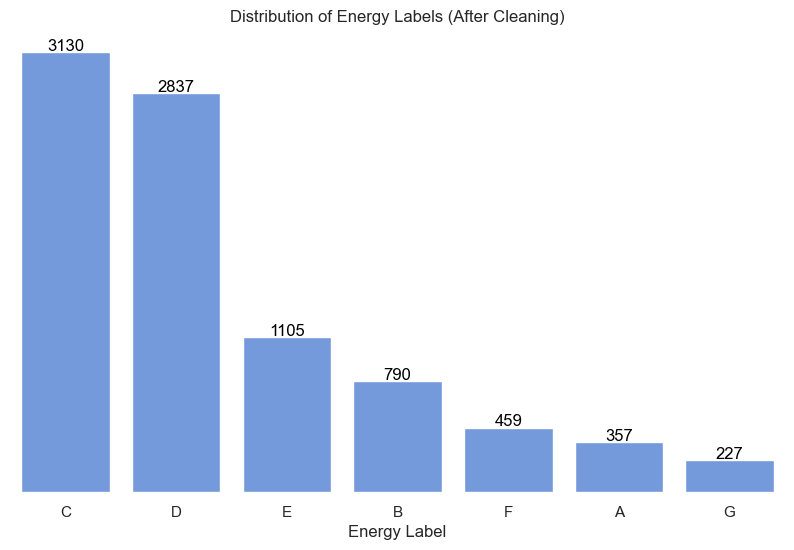

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where 'Energy label' is missing
data_v1_cleaned = data_v1_cleaned.dropna(subset=['Energy label'])

# Combine all variants of 'A' (e.g., 'A2020', 'A2015') into a single category 'A'
data_v1_cleaned['Energy label'] = data_v1_cleaned['Energy label'].replace(['A2020', 'A2015', 'A2'], 'A')

# Count the occurrences of each category in the 'Energy label' column
energy_label_counts_cleaned = data_v1_cleaned['Energy label'].value_counts()

# Plot the counts as a bar plot without y-axis, gridlines, and surrounding box
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=energy_label_counts_cleaned.index, y=energy_label_counts_cleaned.values, color='cornflowerblue')

# Remove the y-axis and gridlines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

# Add labels on top of each bar
for i, v in enumerate(energy_label_counts_cleaned.values):
    ax.text(i, v + 10, str(v), color='black', ha='center', fontsize=12)

plt.title("Distribution of Energy Labels (After Cleaning)")
plt.xlabel("Energy Label")
plt.show()

In [16]:
# Rename the column in the dataset
data_v1_cleaned.rename(columns={'Off. vurdering': 'Public assessment'}, inplace=True)

# Verify the change
print(data_v1_cleaned.columns)

Index(['Adress', 'City', 'Street name', 'Postal code', 'Latitude', 'Longitude',
       'Rooms', 'Property type', 'Energy label', 'Price', 'Province',
       'Days on Market', 'Link', 'Public assessment', 'Home size',
       'Monthly expense', 'Ground size', 'Transport Station Distance (km)',
       'Beach Distance (km)', 'School Distance (km)',
       'Restaurant Distance (km)', 'Hospital Distance (km)',
       'Mall Distance (km)', 'Supermarkets Distance (km)',
       'Distance to Largest City (km)', 'Municipality', 'AverageAge',
       'NumberOfChildren', 'Men', 'Women', 'AverageIncome',
       'Elementary school', 'High school education', 'Vocational Education',
       'Short Higher Education', 'Intermediate Higher Education',
       'Bachelor's programmes', 'Longer Higher Education',
       'PhD and research programs', 'Special Education expense',
       'Healthcare expense', 'Green Spaces expense', 'Infrastructure expense',
       'Social Services expense', 'Landejendom', 'Fritids

In [18]:
import pandas as pd

# Define the baseline variables and the target variable 'Price'
baseline_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 'Monthly expense', 'Ground size']
target_variable = 'Price'

# Check for NaN values in the baseline variables and the target variable
nan_counts = data_v1_cleaned[baseline_variables + [target_variable]].isna().sum()
print("Missing values by column before cleaning:\n", nan_counts)

# Drop rows where any of the baseline variables or 'Price' have missing values
data_cleaned = data_v1_cleaned.dropna(subset=baseline_variables + [target_variable])

# Verify the cleaning: check if there are still any missing values
nan_counts_after_cleaning = data_cleaned[baseline_variables + [target_variable]].isna().sum()
print("Missing values by column after cleaning:\n", nan_counts_after_cleaning)

# Print the length of the cleaned dataset
print(f"Dataset length after cleaning: {len(data_cleaned)}")

# Continue with your model training using the cleaned data



Missing values by column before cleaning:
 Rooms                0
Days on Market       0
Public assessment    0
Home size            0
Monthly expense      0
Ground size          0
Price                0
dtype: int64
Missing values by column after cleaning:
 Rooms                0
Days on Market       0
Public assessment    0
Home size            0
Monthly expense      0
Ground size          0
Price                0
dtype: int64
Dataset length after cleaning: 8905


# Model 1: Baseline model #

In [21]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the baseline variables and the target variable 'Price'
baseline_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 'Monthly expense', 'Ground size']
target_variable = 'Price'

# Ensure all baseline variables and target variable are numeric
data_cleaned[baseline_variables + [target_variable]] = data_cleaned[baseline_variables + [target_variable]].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the baseline variables and 'Price'
data_baseline = data_cleaned.dropna(subset=baseline_variables + [target_variable])

# Verify that all data is numeric and that no NaNs remain
assert data_baseline[baseline_variables + [target_variable]].isnull().sum().sum() == 0, "There are still NaNs present"

# Redefine X and y after dropping missing values
X = data_baseline[baseline_variables].astype(float)
y = data_baseline[target_variable].astype(float)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for the intercept in the training and testing data
X_train_baseline = sm.add_constant(X_train)
X_test_baseline = sm.add_constant(X_test)

# Fit the OLS model for the baseline variables using the training data
baseline_model = sm.OLS(y_train, X_train_baseline).fit(cov_type='HC3')

# Make predictions on the test data
y_pred_baseline = baseline_model.predict(X_test_baseline)

# Calculate RMSE for test data
test_rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Print the summary for the baseline model with RMSE included
print("Baseline Model Summary:\n", baseline_model.summary())
print("\nAdditional Statistics:")
print(f"Test RMSE: {test_rmse_baseline:.4f}")

# Save key statistics for comparison
model_1_statistics = {
    'Model': 'Baseline',
    'R-squared': baseline_model.rsquared,
    'Adj. R-squared': baseline_model.rsquared_adj,
    'F-statistic': baseline_model.fvalue,
    'AIC': baseline_model.aic,
    'BIC': baseline_model.bic,
    'Number of Observations': baseline_model.nobs,
    'Test RMSE': test_rmse_baseline
}

# Save statistics for comparison
model_1_stats_df = pd.DataFrame([model_1_statistics])
model_comparison = pd.DataFrame([model_1_statistics])
model_comparison.to_csv('model_comparison.csv', index=False)



Baseline Model Summary:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     488.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:06:13   Log-Likelihood:            -1.0971e+05
No. Observations:                7117   AIC:                         2.194e+05
Df Residuals:                    7110   BIC:                         2.195e+05
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const        

# Model 2: Including demographic factors #

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define variables for Model 2
model_2_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 
                     'Monthly expense', 'Ground size', 'AverageAge', 'NumberOfChildren', 
                     'Men', 'Women', 'AverageIncome']

# Ensure all variables and target are numeric
data_cleaned[model_2_variables + ['Price']] = data_cleaned[model_2_variables + ['Price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_model_2 = data_cleaned.dropna(subset=model_2_variables + ['Price'])

# Verify no NaNs are left
assert data_model_2[model_2_variables + ['Price']].isnull().sum().sum() == 0, "NaNs present in Model 2 data"

# Define X and y
X = data_model_2[model_2_variables].astype(float)
y = data_model_2['Price'].astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant
X_train_model_2 = sm.add_constant(X_train)
X_test_model_2 = sm.add_constant(X_test)

# Fit the model and remove insignificant variables
removed_variables = []

while True:
    model = sm.OLS(y_train, X_train_model_2).fit(cov_type='HC3')
    max_p_value = model.pvalues.idxmax()
    if model.pvalues[max_p_value] > 0.10:
        X_train_model_2 = X_train_model_2.drop(max_p_value, axis=1)
        X_test_model_2 = X_test_model_2.drop(max_p_value, axis=1)
        removed_variables.append(max_p_value)
    else:
        break

# Final Model 2
final_model_2 = sm.OLS(y_train, X_train_model_2).fit(cov_type='HC3')
y_pred_model_2 = final_model_2.predict(X_test_model_2)
test_rmse_model_2 = np.sqrt(mean_squared_error(y_test, y_pred_model_2))

print("Final Model 2 Summary:\n", final_model_2.summary())
print(f"\nTest RMSE: {test_rmse_model_2:.4f}")

# Save model 2 statistics for comparison
model_2_statistics = {
    'Model': 'Model 2',
    'R-squared': final_model_2.rsquared,
    'Adj. R-squared': final_model_2.rsquared_adj,
    'F-statistic': final_model_2.fvalue,
    'AIC': final_model_2.aic,
    'BIC': final_model_2.bic,
    'Number of Observations': final_model_2.nobs,
    'Test RMSE': test_rmse_model_2
}
model_2_stats_df = pd.DataFrame([model_2_statistics])
model_comparison = pd.concat([model_comparison, model_2_stats_df], ignore_index=True)
model_comparison.to_csv('model_comparison.csv', index=False)


Final Model 2 Summary:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     835.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:06:14   Log-Likelihood:            -1.0993e+05
No. Observations:                7117   AIC:                         2.199e+05
Df Residuals:                    7108   BIC:                         2.199e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

# Model 3: without insignificant variables #

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Model 3 Variables
model_3_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 
                     'Monthly expense', 'Ground size', 'AverageAge', 'AverageIncome', 
                     'Transport Station Distance (km)', 'Beach Distance (km)', 
                     'School Distance (km)', 'Restaurant Distance (km)', 
                     'Hospital Distance (km)', 'Mall Distance (km)', 
                     'Supermarkets Distance (km)']

# Ensure numeric
data_cleaned[model_3_variables + ['Price']] = data_cleaned[model_3_variables + ['Price']].apply(pd.to_numeric, errors='coerce')
data_model_3 = data_cleaned.dropna(subset=model_3_variables + ['Price'])

# Verify no NaNs
assert data_model_3[model_3_variables + ['Price']].isnull().sum().sum() == 0, "NaNs present in Model 3 data"

# Define X and y
X = data_model_3[model_3_variables].astype(float)
y = data_model_3['Price'].astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant
X_train_model_3 = sm.add_constant(X_train)
X_test_model_3 = sm.add_constant(X_test)

# Fit and remove insignificant variables
removed_variables_model_3 = []

while True:
    model = sm.OLS(y_train, X_train_model_3).fit(cov_type='HC3')
    max_p_value = model.pvalues.idxmax()

 # Remove variable if the p-value is above 0.10 threshold
    if model.pvalues[max_p_value] > 0.10:
        X_train_model_3 = X_train_model_3.drop(columns=[max_p_value])
        X_test_model_3 = X_test_model_3.drop(columns=[max_p_value])
        removed_variables_model_3.append(max_p_value)
    else:
        break

# Final Model 3
final_model_3 = sm.OLS(y_train, X_train_model_3).fit(cov_type='HC3')

# Make predictions on the test data
y_pred_model_3 = final_model_3.predict(X_test_model_3)

# Calculate RMSE for the test data
test_rmse_model_3 = np.sqrt(mean_squared_error(y_test, y_pred_model_3))

# Print the summary for the final Model 3 with RMSE included
print("Final Model 3 Summary:\n", final_model_3.summary())
print("\nAdditional Statistics:")
print(f"Test RMSE: {test_rmse_model_3:.4f}")

# Save model 3 statistics for comparison
model_3_statistics = {
    'Model': 'Model 3',
    'R-squared': final_model_3.rsquared,
    'Adj. R-squared': final_model_3.rsquared_adj,
    'F-statistic': final_model_3.fvalue,
    'AIC': final_model_3.aic,
    'BIC': final_model_3.bic,
    'Number of Observations': final_model_3.nobs,
    'Test RMSE': test_rmse_model_3
}

# Convert to DataFrame and append to model comparison
model_3_stats_df = pd.DataFrame([model_3_statistics])
model_comparison = pd.concat([model_comparison, model_3_stats_df], ignore_index=True)

# Save the updated model comparison to a CSV file
model_comparison.to_csv('model_comparison.csv', index=False)

print("Model 3 statistics saved for comparison.")

Final Model 3 Summary:
                                  OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              8228.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                        0.00
Time:                        16:06:15   Log-Likelihood:                     -1.0995e+05
No. Observations:                7117   AIC:                                  2.199e+05
Df Residuals:                    7110   BIC:                                  2.200e+05
Df Model:                           7                                                  
Covariance Type:                  HC3                                                  
                               coef    std err          z      P>|z|      [0.025      0.975]
---

# Test for multi + overfitting #

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(X):
    # Create a DataFrame to hold VIF values
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the baseline model's variables
X_train_vif = X_train_baseline.drop('const', axis=1)  # Remove the constant column for VIF calculation
vif_data = calculate_vif(X_train_vif)

# Display the VIF values
print(vif_data)

# Evaluate the model's performance on the training set
train_r_squared = baseline_model.rsquared

# Evaluate the model's performance on the test set
test_r_squared = baseline_model.rsquared

# Make predictions on the test data
y_pred_test = baseline_model.predict(X_test_baseline)

# Calculate R-squared for test data
test_r_squared = baseline_model.rsquared

# Compare the performance on training and test set
print(f"Training R-squared: {train_r_squared}")
print(f"Test R-squared: {test_r_squared}")

            Variable        VIF
0              Rooms  19.189816
1     Days on Market   1.418973
2  Public assessment  11.218095
3          Home size  20.661563
4    Monthly expense  14.268515
5        Ground size   1.314822
Training R-squared: 0.8635026455107381
Test R-squared: 0.8635026455107381


In [32]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define variables for Model 4
initial_model_4_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 
                             'Monthly expense', 'Ground size', 'AverageAge', 'AverageIncome', 
                             'Transport Station Distance (km)', 'Beach Distance (km)', 
                             'School Distance (km)', 'Restaurant Distance (km)', 
                             'Hospital Distance (km)', 'Mall Distance (km)', 
                             'Supermarkets Distance (km)']

# Create dummy variables for 'Energy label'
data_with_dummies = pd.get_dummies(data_cleaned, columns=['Energy label'], drop_first=True)

# List the dummy variables for Energy labels and add them to the model variables
energy_label_dummies = [col for col in data_with_dummies.columns if col.startswith('Energy label_')]
model_4_variables = initial_model_4_variables + energy_label_dummies

# Ensure all variables and the target variable 'Price' are numeric
data_with_dummies[model_4_variables + ['Price']] = data_with_dummies[model_4_variables + ['Price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_model_4 = data_with_dummies.dropna(subset=model_4_variables + ['Price'])

# Ensure no NaNs remain in the data
assert data_model_4[model_4_variables + ['Price']].isnull().sum().sum() == 0, "NaNs present in Model 4 data"

# Redefine X and y
X = data_model_4[model_4_variables].astype(float)
y = data_model_4['Price'].astype(float)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for the intercept in the training and testing data
X_train_model_4 = sm.add_constant(X_train)
X_test_model_4 = sm.add_constant(X_test)

# Initialize a list to keep track of removed variables
removed_variables_model_4 = []

while True:
    # Create an OLS model
    model = sm.OLS(y_train, X_train_model_4).fit(cov_type='HC3')

    # Find the variable with the highest p-value
    max_p_value = model.pvalues.idxmax()

    # Remove variables with a p-value above 0.10
    if model.pvalues[max_p_value] > 0.10:
        X_train_model_4 = X_train_model_4.drop(columns=[max_p_value])
        X_test_model_4 = X_test_model_4.drop(columns=[max_p_value])
        removed_variables_model_4.append(max_p_value)
    else:
        break

# Final Model 4
final_model_4 = sm.OLS(y_train, X_train_model_4).fit(cov_type='HC3')

# Make predictions on the test data
y_pred_model_4 = final_model_4.predict(X_test_model_4)

# Calculate RMSE for the test data
test_rmse_model_4 = np.sqrt(mean_squared_error(y_test, y_pred_model_4))

# Print the summary for the final Model 4 with RMSE included
print("Final Model 4 Summary:\n", final_model_4.summary())
print("\nAdditional Statistics:")
print(f"Test RMSE: {test_rmse_model_4:.4f}")

# Save Model 4 statistics for comparison
model_4_statistics = {
    'Model': 'Model 4',
    'R-squared': final_model_4.rsquared,
    'Adj. R-squared': final_model_4.rsquared_adj,
    'F-statistic': final_model_4.fvalue,
    'AIC': final_model_4.aic,
    'BIC': final_model_4.bic,
    'Number of Observations': final_model_4.nobs,
    'Test RMSE': test_rmse_model_4
}

# Convert to DataFrame and append to model comparison
model_4_stats_df = pd.DataFrame([model_4_statistics])
model_comparison = pd.concat([model_comparison, model_4_stats_df], ignore_index=True)

# Save the updated model comparison to a CSV file
model_comparison.to_csv('model_comparison.csv', index=False)

print("Model 4 statistics saved for comparison.")


Final Model 4 Summary:
                                  OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              4977.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                        0.00
Time:                        16:06:16   Log-Likelihood:                     -1.0993e+05
No. Observations:                7117   AIC:                                  2.199e+05
Df Residuals:                    7105   BIC:                                  2.200e+05
Df Model:                          12                                                  
Covariance Type:                  HC3                                                  
                               coef    std err          z      P>|z|      [0.025      0.975]
---

In [34]:
data_cleaned.columns

Index(['Adress', 'City', 'Street name', 'Postal code', 'Latitude', 'Longitude',
       'Rooms', 'Property type', 'Energy label', 'Price', 'Province',
       'Days on Market', 'Link', 'Public assessment', 'Home size',
       'Monthly expense', 'Ground size', 'Transport Station Distance (km)',
       'Beach Distance (km)', 'School Distance (km)',
       'Restaurant Distance (km)', 'Hospital Distance (km)',
       'Mall Distance (km)', 'Supermarkets Distance (km)',
       'Distance to Largest City (km)', 'Municipality', 'AverageAge',
       'NumberOfChildren', 'Men', 'Women', 'AverageIncome',
       'Elementary school', 'High school education', 'Vocational Education',
       'Short Higher Education', 'Intermediate Higher Education',
       'Bachelor's programmes', 'Longer Higher Education',
       'PhD and research programs', 'Special Education expense',
       'Healthcare expense', 'Green Spaces expense', 'Infrastructure expense',
       'Social Services expense', 'Landejendom', 'Fritids

In [36]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the initial variables for Model 5 (socioeconomic and other variables, excluding Municipality dummies)
initial_model_5_variables = ['Rooms', 'Days on Market', 'Public assessment', 'Home size', 
                             'Monthly expense', 'Ground size', 'AverageAge', 'AverageIncome', 
                             'Restaurant Distance (km)', 'Mall Distance (km)',
                             'Vocational Education', 'Short Higher Education', 'Longer Higher Education',
                             'Healthcare expense', 'Green Spaces expense']

# Add dummy variables for 'Energy label' only (no Municipality dummies)
data_with_dummies = pd.get_dummies(data_cleaned, columns=['Energy label'], drop_first=True)

# Ensure all variables (including dummy variables) and the target variable 'Price' are numeric
data_with_dummies[initial_model_5_variables + ['Price']] = data_with_dummies[initial_model_5_variables + ['Price']].apply(pd.to_numeric, errors='coerce')

# List the dummy variables for Energy labels and add them to the model variables
energy_label_dummies = [col for col in data_with_dummies.columns if col.startswith('Energy label_')]
model_5_variables = initial_model_5_variables + energy_label_dummies

# Drop rows where any of the selected variables or 'Price' have missing values
data_model_5 = data_with_dummies.dropna(subset=model_5_variables + ['Price'])

# Ensure all variables in X and y are numeric and clean
X = data_model_5[model_5_variables].astype(float)
y = data_model_5['Price'].astype(float)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for the intercept in the training and testing data
X_train_model_5 = sm.add_constant(X_train)
X_test_model_5 = sm.add_constant(X_test)

# Initialize a list to keep track of removed variables
removed_variables_model_5 = []

while True:
    # Create an OLS model
    model = sm.OLS(y_train, X_train_model_5)

    # Fit the OLS model with heteroscedasticity robust errors (HC3)
    results = model.fit(cov_type='HC3')

    # Find the variable with the highest p-value (least significant)
    max_p_value = results.pvalues.idxmax()

    # Check if the highest p-value is above a certain threshold (e.g., 0.10)
    if results.pvalues[max_p_value] > 0.10:
        print(f"Removing '{max_p_value}' (p-value: {results.pvalues[max_p_value]:.4f})")
        # Drop the variable with the highest p-value from the model
        X_train_model_5 = X_train_model_5.drop(columns=[max_p_value])
        X_test_model_5 = X_test_model_5.drop(columns=[max_p_value])
        removed_variables_model_5.append(max_p_value)
    else:
        break

# Print removed variables for tracking
print("Removed Variables for Model 5:", removed_variables_model_5)

# Final model with significant variables
final_model_5 = sm.OLS(y_train, X_train_model_5).fit(cov_type='HC3')

# Make predictions on the test data
y_pred_model_5 = final_model_5.predict(X_test_model_5)

# Calculate RMSE for test data
test_rmse_model_5 = np.sqrt(mean_squared_error(y_test, y_pred_model_5))

# Print the summary for the final Model 5 with RMSE included
print("Final Model 5 Summary:\n", final_model_5.summary())

# Add RMSE to the summary output
print("\nAdditional Statistics:")
print(f"Test RMSE: {test_rmse_model_5:.4f}")

# Save key statistics for comparison
model_5_statistics = {
    'Model': 'Model 5 (Final)',
    'R-squared': final_model_5.rsquared,
    'Adj. R-squared': final_model_5.rsquared_adj,
    'F-statistic': final_model_5.fvalue,
    'AIC': final_model_5.aic,
    'BIC': final_model_5.bic,
    'Number of Observations': final_model_5.nobs,
    'Test RMSE': test_rmse_model_5
}

# Convert the dictionary to a DataFrame for appending
model_5_stats_df = pd.DataFrame([model_5_statistics])

# Combine the existing comparison DataFrame with the new model statistics
model_comparison = pd.concat([model_comparison, model_5_stats_df], ignore_index=True)

# Save the updated model comparison to a CSV file
model_comparison.to_csv('model_comparison.csv', index=False)

print("Model 5 statistics saved for comparison.")


Removing 'Monthly expense' (p-value: 0.3003)
Removing 'Energy label_C' (p-value: 0.1419)
Removing 'Energy label_B' (p-value: 0.4551)
Removed Variables for Model 5: ['Monthly expense', 'Energy label_C', 'Energy label_B']
Final Model 5 Summary:
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     719.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:06:17   Log-Likelihood:            -1.0990e+05
No. Observations:                7117   AIC:                         2.198e+05
Df Residuals:                    7098   BIC:                         2.200e+05
Df Model:                          18                                         
Covariance Type:                  HC3        

C:\Users\sd101\OneDrive - University of Copenhagen\SDS\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 16
  warnings.warn('covariance of constraints does not have full '


In [38]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the baseline variables for Model 6
model_6_variables = [
    'Rooms', 'Days on Market', 'Public assessment', 'Home size', 
    'Ground size', 'AverageAge', 'AverageIncome', 
    'Restaurant Distance (km)', 'Mall Distance (km)', 
    'Vocational Education', 'Short Higher Education', 'Longer Higher Education', 
    'Healthcare expense', 'Green Spaces expense'
]

# Create dummy variables for 'Energy label'
data_with_dummies = pd.get_dummies(data_cleaned, columns=['Energy label'], drop_first=True)

# List the available energy label dummies in the dataset
energy_label_dummies = [col for col in data_with_dummies.columns if col.startswith('Energy label_')]

# Update the variable list to include all energy label dummies
model_6_variables += energy_label_dummies

# Add interaction terms
data_with_dummies['Home size × AverageIncome'] = data_with_dummies['Home size'] * data_with_dummies['AverageIncome']
data_with_dummies['Rooms × AverageIncome'] = data_with_dummies['Rooms'] * data_with_dummies['AverageIncome']
data_with_dummies['Home size × Green Spaces expense'] = data_with_dummies['Home size'] * data_with_dummies['Green Spaces expense']

# Add interaction terms for all existing energy labels
for label in energy_label_dummies:
    data_with_dummies[f'{label} × Home size'] = data_with_dummies[label] * data_with_dummies['Home size']
    data_with_dummies[f'{label} × AverageIncome'] = data_with_dummies[label] * data_with_dummies['AverageIncome']
    
    # Add the new interaction terms to the variable list
    model_6_variables.append(f'{label} × Home size')
    model_6_variables.append(f'{label} × AverageIncome')

# Ensure all selected variables and the target variable 'Price' are numeric
# Convert all columns to numeric, coercing errors to NaN
data_with_dummies[model_6_variables + ['Price']] = data_with_dummies[model_6_variables + ['Price']].apply(pd.to_numeric, errors='coerce')

# Drop rows where any of the selected variables or 'Price' have missing values
data_model_6 = data_with_dummies.dropna(subset=model_6_variables + ['Price'])

# Double-check all columns in X and y are numeric
for col in model_6_variables + ['Price']:
    if data_model_6[col].dtype != 'float64' and data_model_6[col].dtype != 'int64':
        print(f"Column {col} is not numeric! It is of type {data_model_6[col].dtype}")

# Redefine X and y after dropping missing values
X = data_model_6[model_6_variables]
y = data_model_6['Price']

# Convert X and y to numpy arrays to ensure compatibility with statsmodels
X = X.astype(float)
y = y.astype(float)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant for the intercept in the training and testing data
X_train_model_6 = sm.add_constant(X_train)
X_test_model_6 = sm.add_constant(X_test)

# Initialize a list to keep track of removed variables
removed_variables_model_6 = []

while True:
    # Create an OLS model
    model = sm.OLS(y_train, X_train_model_6)

    # Fit the OLS model with heteroscedasticity robust errors (HC3)
    results = model.fit(cov_type='HC3')

    # Find the variable with the highest p-value (least significant)
    max_p_value = results.pvalues.idxmax()

    # Check if the highest p-value is above a certain threshold (e.g., 0.10)
    if results.pvalues[max_p_value] > 0.10:
        print(f"Removing '{max_p_value}' (p-value: {results.pvalues[max_p_value]:.4f})")
        # Drop the variable with the highest p-value from the model
        X_train_model_6 = X_train_model_6.drop(columns=[max_p_value])
        X_test_model_6 = X_test_model_6.drop(columns=[max_p_value])
        removed_variables_model_6.append(max_p_value)
    else:
        break

# Print removed variables for tracking
print("Removed Variables for Model 6:", removed_variables_model_6)

# Final model with significant variables
final_model_6 = sm.OLS(y_train, X_train_model_6).fit(cov_type='HC3')

# Make predictions on the test data
y_pred_model_6 = final_model_6.predict(X_test_model_6)

# Calculate RMSE for test data
test_rmse_model_6 = np.sqrt(mean_squared_error(y_test, y_pred_model_6))

# Print the summary for the final Model 6 with RMSE included
print("Final Model 6 Summary:\n", final_model_6.summary())

# Add RMSE to the summary output
print("\nAdditional Statistics:")
print(f"Test RMSE: {test_rmse_model_6:.4f}")

# Save key statistics for comparison
model_6_statistics = {
    'Model': 'Model 6 (Final)',
    'R-squared': final_model_6.rsquared,
    'Adj. R-squared': final_model_6.rsquared_adj,
    'F-statistic': final_model_6.fvalue,
    'AIC': final_model_6.aic,
    'BIC': final_model_6.bic,
    'Number of Observations': final_model_6.nobs,
    'Test RMSE': test_rmse_model_6
}

# Convert the dictionary to a DataFrame for appending
model_6_stats_df = pd.DataFrame([model_6_statistics])

# Combine the existing comparison DataFrame with the new model statistics
model_comparison = pd.concat([model_comparison, model_6_stats_df], ignore_index=True)

# Save the updated model comparison to a CSV file
model_comparison.to_csv('model_comparison.csv', index=False)

print("Model 6 statistics saved for comparison.")


Column Energy label_B is not numeric! It is of type bool
Column Energy label_C is not numeric! It is of type bool
Column Energy label_D is not numeric! It is of type bool
Column Energy label_E is not numeric! It is of type bool
Column Energy label_F is not numeric! It is of type bool
Column Energy label_G is not numeric! It is of type bool
Removing 'Energy label_E × AverageIncome' (p-value: 0.9426)
Removing 'Energy label_F × AverageIncome' (p-value: 0.9094)
Removing 'Energy label_D' (p-value: 0.8930)
Removing 'Energy label_C × AverageIncome' (p-value: 0.7947)
Removing 'Energy label_G × AverageIncome' (p-value: 0.4610)
Removing 'Energy label_B × AverageIncome' (p-value: 0.3454)
Removing 'AverageIncome' (p-value: 0.3140)
Removed Variables for Model 6: ['Energy label_E × AverageIncome', 'Energy label_F × AverageIncome', 'Energy label_D', 'Energy label_C × AverageIncome', 'Energy label_G × AverageIncome', 'Energy label_B × AverageIncome', 'AverageIncome']
Final Model 6 Summary:
           

C:\Users\sd101\OneDrive - University of Copenhagen\SDS\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 25, but rank is 21
  warnings.warn('covariance of constraints does not have full '


In [96]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Step 1: Identify and remove any rows with NaN, inf, or -inf values
def clean_data(X, y):
    """Removes rows with NaN, inf, or -inf values from the dataset."""
    mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
    X_clean = X[mask]
    y_clean = y[mask]
    return X_clean, y_clean

# Prepare the data for VIF and overfitting tests
X = data_model_4[model_4_variables]  # Adjust to Model 4 variables
y = data_model_4['Price']

# Add constant for intercept
X_vif = sm.add_constant(X)

# Check for any non-numeric columns that could cause the error
non_numeric_columns = X_vif.select_dtypes(include=['object', 'bool']).columns
print("Non-numeric columns in data:", non_numeric_columns)

# Drop or convert any non-numeric columns to prevent errors
X_vif = X_vif.drop(columns=non_numeric_columns)

# Clean data to remove rows with NaN, inf, or -inf values
X_vif, y = clean_data(X_vif, y)

# Step 2: VIF Calculation
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the remaining variables
vif_results = calculate_vif(X_vif)
print("VIF Results:\n", vif_results)

# Step 3: Overfitting Test (train vs test performance)
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.2, random_state=42)

# Fit the OLS model
model_4 = sm.OLS(y_train, X_train).fit(cov_type='HC3')

# Evaluate performance on the training set
train_r_squared = model_4.rsquared
train_rmse = np.sqrt(mean_squared_error(y_train, model_4.predict(X_train)))

# Evaluate performance on the test set
y_pred_model_4 = model_4.predict(X_test)
test_r_squared = model_4.rsquared
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_model_4))

# Print the performance results
print("\nOverfitting Test Results:")
print(f"Training R-squared: {train_r_squared:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test R-squared: {test_r_squared:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Non-numeric columns in data: Index(['Energy label_B', 'Energy label_C', 'Energy label_D', 'Energy label_E',
       'Energy label_F', 'Energy label_G'],
      dtype='object')
VIF Results:
                            Variable         VIF
0                             const  423.717952
1                             Rooms    2.016453
2                    Days on Market    1.017084
3                 Public assessment    7.607570
4                         Home size    2.320965
5                   Monthly expense    6.222631
6                       Ground size    1.153881
7                        AverageAge    1.442525
8                     AverageIncome    1.918150
9   Transport Station Distance (km)    1.548397
10              Beach Distance (km)    1.212194
11             School Distance (km)    1.256872
12         Restaurant Distance (km)    1.290865
13           Hospital Distance (km)    1.489147
14               Mall Distance (km)    1.566806
15       Supermarkets Distance (km)    1.373